# MNIST Digits - Classification Using SVM

Sample images - https://www.kaggle.com/datasets/scolianni/mnistasjpg.

# Objective
We will develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

# Data Description
For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. 

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
# read the dataset
digits = pd.read_csv("train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [16]:
# head
digits.head(30)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
n=18
d = digits.iloc[n, 1:]
d.shape

(784,)

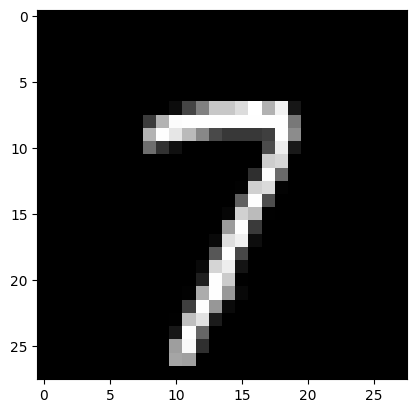

In [18]:
d = d.values.reshape(28, 28)
plt.imshow(d, cmap='gray');

In [19]:
# visualise the array
print(d[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  12  69 128 199 199 220 255 177 242  22   0   0   0]
 [  0   0   0  59 180 252 254 254 254 254 254 254 254 254 120   0   0   0]
 [  0   0   0 179 254 230 186 136  73  56  56  56  63 254 140   0   0   0]
 [  0   0   0 110  50  16   0   0   0   0   0   0  76 237  25   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 205 214   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  47 252 105   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 208 219   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  96 254  78   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6 209 187   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 155 254  58   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9 222 240  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [20]:
# Summarise the counts of 'label' to see how many labels of each digit are present
digits.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [21]:
# Summarise count in terms of percentage 
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

Thus, each digit/label has an approximately 9%-11% fraction in the dataset and the **dataset is balanced**. This is an important factor in considering the choices of models to be used, especially SVM, since **SVMs rarely perform well on imbalanced data** (think about why that might be the case).

Let's quickly look at missing values, if any.

Also, let's look at the average values of each column, since we'll need to do some rescaling in case the ranges vary too much.

In [22]:
# average values/distributions of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


You can see that the max value of the mean and maximum values of some features (pixels) is 139, 255 etc., whereas most features lie in much lower ranges  (look at description of pixel 0, pixel 1 etc. above).

Thus, it seems like a good idea to rescale the features.

## Data Preparation for Model Building

Let's now prepare the dataset for building the model. We'll only use a fraction of the data else training will take a long time.


In [26]:
# Creating Features and Label split
X = digits.iloc[:, 1:]
y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)
X.shape

(42000, 784)

## Model Building

Let's now build the model and tune the hyperparameters. Let's start with a **linear model** first.

### Linear SVM

Let's first try building a linear SVM model (i.e. a linear kernel). 

In [14]:
from sklearn import svm

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X, y)

SVC(kernel='linear')

In [1]:
import pickle

pickle.dump(svm_linear,open('svc_model.pkl','wb'))

# For Predicting run cell from here

In [2]:
import pickle
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser

model=pickle.load(open('svc_model.pkl','rb'))

In [20]:
test_set=pd.read_csv('test.csv')
test_set

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 80


Predicted Number is 5


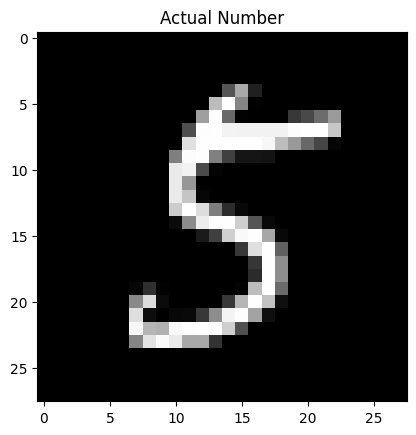

In [37]:
n=int(input())
if n>28000:
    print('>28000 expected')

plt.title('Actual Number')
plt.imshow(np.array(test_set.iloc[n,:]).reshape(28,28),cmap='gray'); #Actual picked Image
print(f'Predicted Number is {model.predict([test_set.iloc[n,:]])[0]}')#Predicted

In [15]:
def load_img(fc):
        img=Image.open(f'headstSet/{fc.selected_filename}')
        print('Selected Image')
        plt.imshow(img,cmap='gray');
        return img

def pred(img):
    img_array=np.array(img).reshape(784,)
    print('Predicted Number')
    print(model.predict([img_array])[0])
    plt.imshow(img_array.reshape(28,28),cmap='gray');


fc = FileChooser('')
display(fc) # Select image from testSet Folder

FileChooser(path='C:\Users\hp\Downloads\MNIST_Handwritten_Digit_Recognition-SVM', filename='', title='', show_…

Selected Image


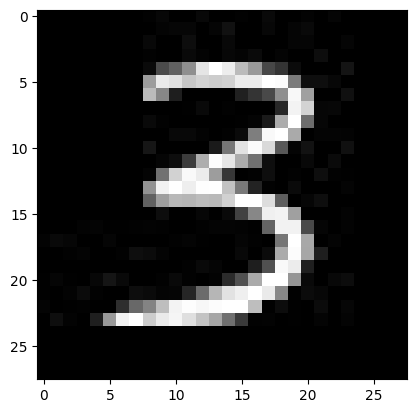

In [29]:
img=load_img(fc)

Predicted Number
3


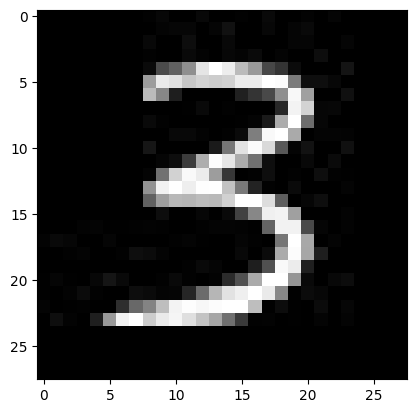

In [30]:
pred(img)